In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.units as u
import astropy.constants as c
import itertools
%matplotlib inline

dturb = '/Users/roxanachira/Dropbox/chira2018/pics/data/'

In [2]:
def zboldyrev(p):
    return (p/9.+1.-(1./3.)**(p/3.))

def zshe(p):
    return (p/9.+2.-2.*(2./3.)**(p/3.))

In [3]:
fcloud = ['M3','M4','M8']
fjeans = ['04','08','32']
fdir   = ['x','y','z']

ms = 10
lw = 7

xlim     = [ 0.0,6.2]
ylimzeta = [-1,2.5]

color = ['red','green','blue']

In [4]:
ifile = '/Users/roxanachira/Dropbox/chira2018/pics/data/error_vsfhr04.dat'
data = np.genfromtxt(ifile,skip_header=1,dtype=None,delimiter='\t',names=['cloud','e_quantity','order','time','e_value'])

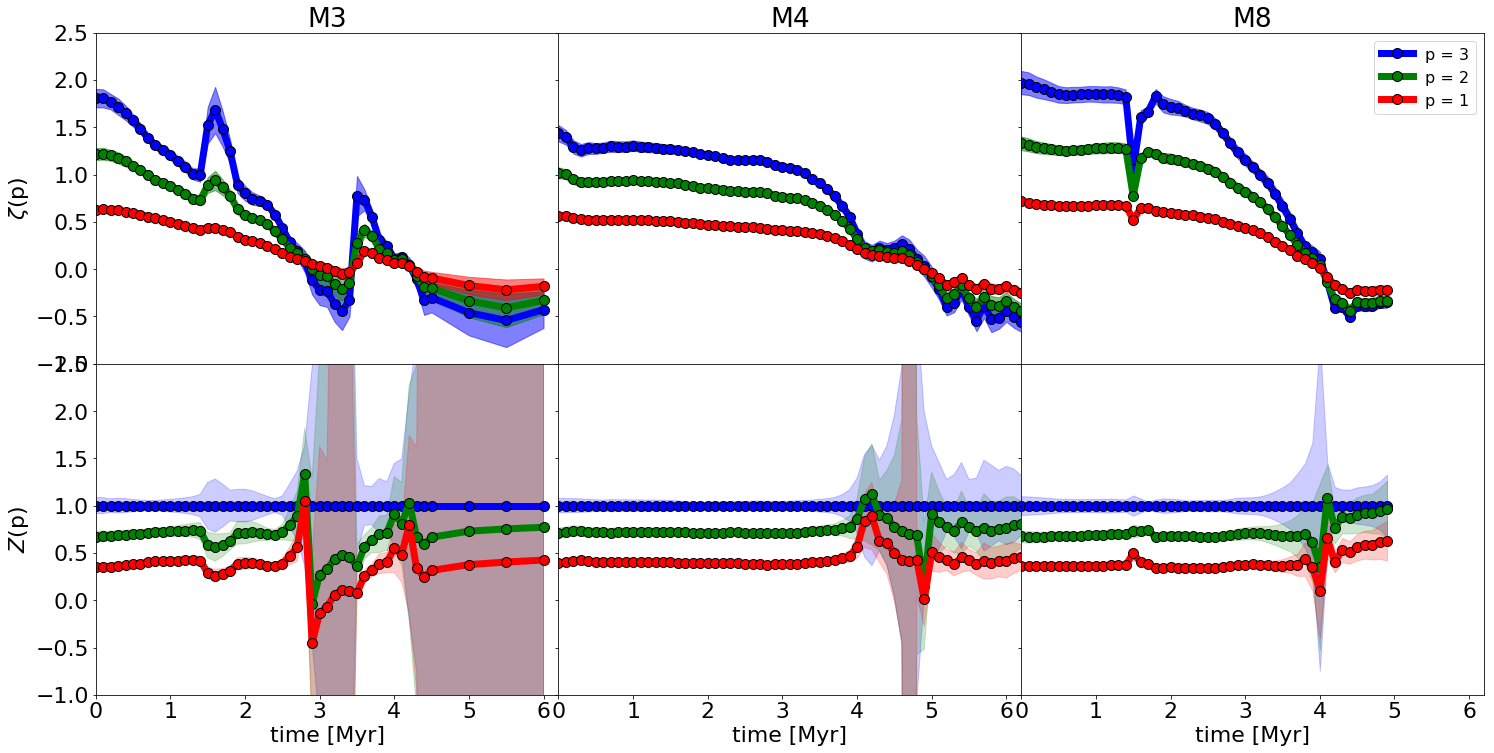

In [7]:
plt.close()

dvsf  = dturb + 'vsfhr04/'

plt.rcParams['font.size'] = 22

fig,ax = plt.subplots(ncols=3,nrows=2,sharex=True,sharey=True,figsize=(21,11))

for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    
    ifile = glob((dvsf+'zeta_fitted_%s.out' % cloud))[0]
    time,zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([]),np.array([])
    time,zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(0,1,2,3),unpack=True)
    
    ezeta1,ez1 = np.zeros(len(zeta1)),np.zeros(len(zeta1))
    for j in range(len(ezeta1)):
        h = np.where((data['cloud'] == cloud) & (data['e_quantity'] == 'e_zeta') & (data['order'] == 1) & (data['time'] == time[j]))[0]
        ezeta1[j] = data['e_value'][h]
        h = np.where((data['cloud'] == cloud) & (data['e_quantity'] == 'e_Z') & (data['order'] == 1) & (data['time'] == time[j]))[0]
        ez1[j] = data['e_value'][h]
    
    ezeta2,ez2 = np.zeros(len(zeta1)),np.zeros(len(zeta1))
    for j in range(len(ezeta1)):
        h = np.where((data['cloud'] == cloud) & (data['e_quantity'] == 'e_zeta') & (data['order'] == 2) & (data['time'] == time[j]))[0]
        ezeta2[j] = data['e_value'][h]
        h = np.where((data['cloud'] == cloud) & (data['e_quantity'] == 'e_Z') & (data['order'] == 2) & (data['time'] == time[j]))[0]
        ez2[j] = data['e_value'][h]
        
    ezeta3,ez3 = np.zeros(len(zeta1)),np.zeros(len(zeta1))
    for j in range(len(ezeta1)):
        h = np.where((data['cloud'] == cloud) & (data['e_quantity'] == 'e_zeta') & (data['order'] == 3) & (data['time'] == time[j]))[0]
        ezeta3[j] = data['e_value'][h]
        h = np.where((data['cloud'] == cloud) & (data['e_quantity'] == 'e_Z') & (data['order'] == 3) & (data['time'] == time[j]))[0]
        ez3[j] = data['e_value'][h]
    
    for p in range(3,0,-1):
        if(p==1): 
            zetap  = zeta1
            ezetap = ezeta1
            ezp    = ez1
        if(p==2): 
            zetap  = zeta2
            ezetap = ezeta2
            ezp    = ez2
        if(p==3): 
            zetap  = zeta3
            ezetap = ezeta3
            ezp    = ez3
        zp  = zetap/zeta3
            
        ax[0,icloud].fill_between(time,zetap-ezetap,zetap+ezetap,color=color[p-1],alpha=0.5)
        ax[0,icloud].plot(time,zetap,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
         
        ax[1,icloud].fill_between(time,zp-ezp,zp+ezp,color=color[p-1],alpha=0.2)
        ax[1,icloud].plot(time,zp,ms=ms,lw=lw,color=color[p-1],marker='o',ls='-',markeredgecolor='black',label=('p = %i' % p))
        
        
    ax[0,icloud].set_title(cloud)
    if(icloud == 2): ax[0,icloud].legend(loc=0,fontsize=16)
    
    ax[0,icloud].set_xlim(xlim)
    ax[0,icloud].set_ylim(ylimzeta)
    if(icloud == 0):
        ax[0,icloud].set_ylabel('$\zeta$(p)')
        ax[1,icloud].set_ylabel('$Z$(p)')
    ax[1,icloud].set_xlabel('time [Myr]')
        
fig.tight_layout(pad=1.2)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig('/Users/roxanachira/Dropbox/chira2018/pics/error_vsf04_zeta_z.pdf')